In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

In [0]:
X = lfw_dataset.data

In [4]:
X.shape

(1140, 2914)

In [5]:
n_features = X.shape[1]
y = lfw_dataset.target
target_names = lfw_dataset.target_names
n_classes = target_names.shape[0]
print('Number of training examples ::',X.shape[0])
print("Number of features ::",n_features)
print('Number of classes ::',n_classes)
print("Target Names ::",target_names)

Number of training examples :: 1140
Number of features :: 2914
Number of classes :: 5
Target Names :: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [0]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3, random_state = 21)

In [0]:
pca = PCA(n_components = 100)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [8]:
X_train_pca.shape

(798, 100)

In [0]:
X_pca=pca.transform(X)

In [10]:
print(pca.explained_variance_ratio_)

[0.18149869 0.15019265 0.07536319 0.05864163 0.05300169 0.02995113
 0.02419904 0.02189768 0.02053066 0.02011632 0.01541837 0.01461648
 0.01213785 0.01125976 0.01005597 0.00950516 0.00904907 0.00893629
 0.00822557 0.00721958 0.00663918 0.00654208 0.00621699 0.00574833
 0.00553163 0.00538312 0.00508722 0.00485073 0.00460208 0.00428323
 0.00411727 0.00385344 0.00373363 0.00356806 0.00347326 0.00336916
 0.00334567 0.0031272  0.00303466 0.00296354 0.00286001 0.0027819
 0.0027609  0.00264227 0.00253387 0.00248524 0.00246341 0.00242124
 0.00226839 0.00222696 0.00214582 0.00212609 0.00206016 0.0020021
 0.00196745 0.00192431 0.00189452 0.00182827 0.00178058 0.00174631
 0.00168262 0.00163146 0.00162385 0.0015719  0.00154489 0.00153885
 0.00148703 0.00147279 0.00142784 0.00141757 0.00140052 0.00135127
 0.00131401 0.00129274 0.00127671 0.00125047 0.0012271  0.00120313
 0.0011886  0.00117699 0.00116213 0.00114133 0.00112448 0.00108495
 0.0010673  0.00104577 0.00101413 0.00101163 0.00099982 0.000980

Text(0.5, 1.0, 'PCA Explained Variance Ratio')

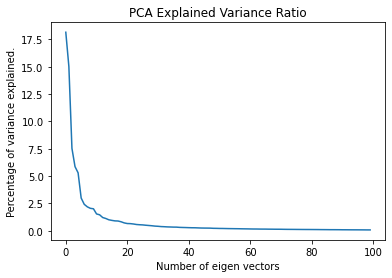

In [11]:
plt.plot(pca.explained_variance_ratio_*100)
plt.ylabel('Percentage of variance explained.')
plt.xlabel('Number of eigen vectors')
plt.title('PCA Explained Variance Ratio')

In [0]:
X_train_tsne = TSNE(n_components=2, random_state=21).fit_transform( X_train_pca ) 
X_test_tsne  = TSNE(n_components=2, random_state=21).fit_transform( X_test_pca )
X_tsne = TSNE(n_components=2,random_state=21).fit_transform(X_pca)

In [13]:
X_train_tsne.shape

(798, 2)

In [0]:
df_pca=pd.DataFrame(X_pca)
df_tsne=pd.DataFrame(X_tsne)

In [0]:
df_tsne['label']=y
df_pca['label']=y

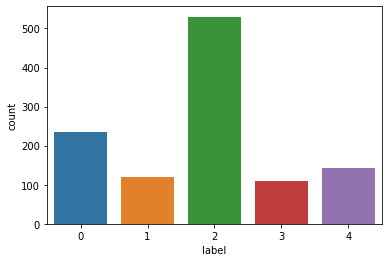

In [16]:
sns.countplot(df_tsne['label'])

In [0]:
dd=[]
for i in range(len(df_tsne)):
  if df_tsne.iloc[i,-1]<2 or df_tsne.iloc[i,-1]==4:
    dd.append(df_tsne.iloc[i,:])

dd_pca=[]
for i in range(len(df_pca)):
  if df_pca.iloc[i,-1]<2 or df_tsne.iloc[i,-1]==4:
    dd_pca.append(df_pca.iloc[i,:])

In [0]:
data1=pd.DataFrame(dd_pca)
data2=pd.DataFrame(dd)
data2.columns=['a','b','label']

Text(0, 0.5, 'Vector 2')

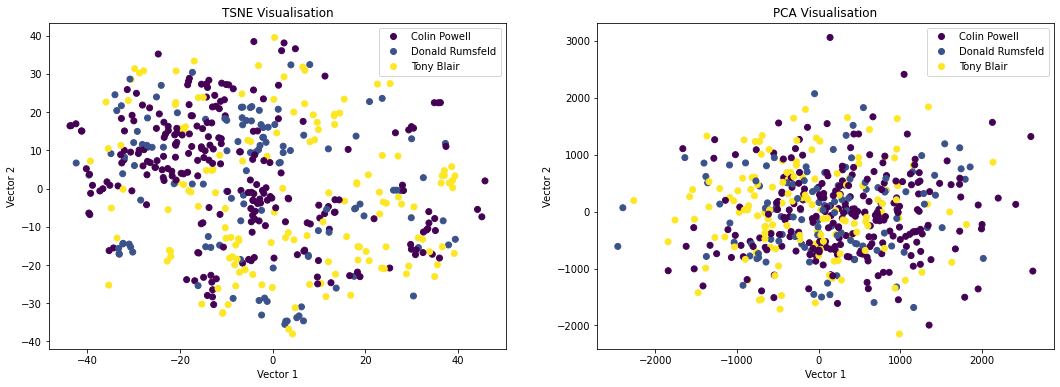

In [19]:
classes=['Colin Powell', 'Donald Rumsfeld', 'Tony Blair']
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
scatter=plt.scatter(data2.iloc[:,0],data2.iloc[:,1], c=data2['label'])
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('TSNE Visualisation')
plt.xlabel('Vector 1')
plt.ylabel('Vector 2')
plt.subplot(1,2,2)
plt.scatter(data1.iloc[:,0],data1.iloc[:,1], c=data1['label'])
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('PCA Visualisation')
plt.xlabel('Vector 1')
plt.ylabel('Vector 2')

Text(0, 0.5, 'Vector 2')

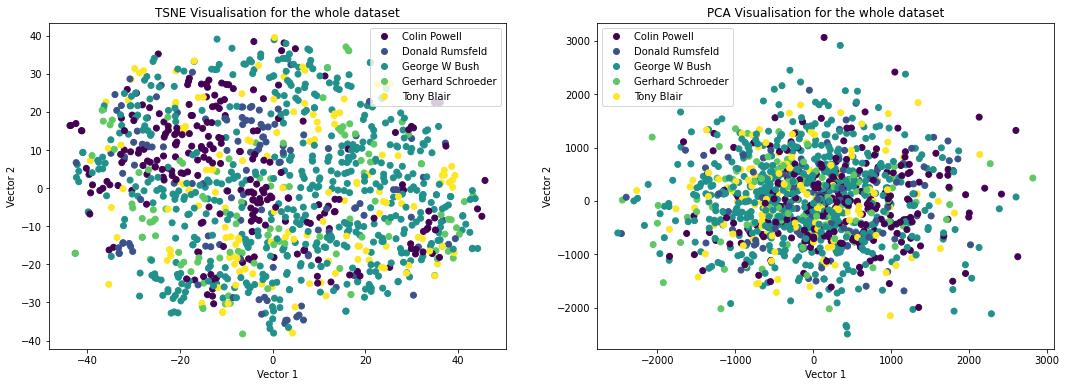

In [20]:
classes=['Colin Powell', 'Donald Rumsfeld', 'George W Bush','Gerhard Schroeder', 'Tony Blair']
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
scatter=plt.scatter(df_tsne.iloc[:,0],df_tsne.iloc[:,1], c=df_tsne['label'])
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('TSNE Visualisation for the whole dataset')
plt.xlabel('Vector 1')
plt.ylabel('Vector 2')
plt.subplot(1,2,2)
plt.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1], c=df_pca['label'])
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('PCA Visualisation for the whole dataset')
plt.xlabel('Vector 1')
plt.ylabel('Vector 2')

In [0]:
X_tsne1 = TSNE(n_components=2,random_state=21).fit_transform(X)

In [0]:
g=pd.DataFrame(X_tsne1)
g['label']=y
g.columns=['a','b','label']

In [0]:
di=dict({0:'Colin Powell',1:'Donald Rumsfeld',2:'George W Bush',3:'Gerhard Schroeder',4:'Tony Blair'})
df_tsne['label']=df_tsne['label'].map(di)

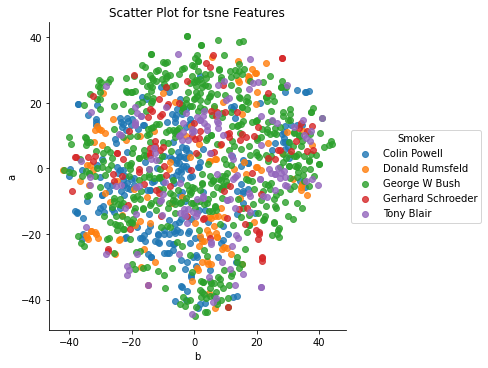

In [24]:
gg=sns.lmplot('b','a', g, hue='label', fit_reg=False, legend=False)
plt.title("Scatter Plot for tsne Features")
plt.legend(title='Smoker', loc='center left', labels=target_names, bbox_to_anchor=(1, 0.5))

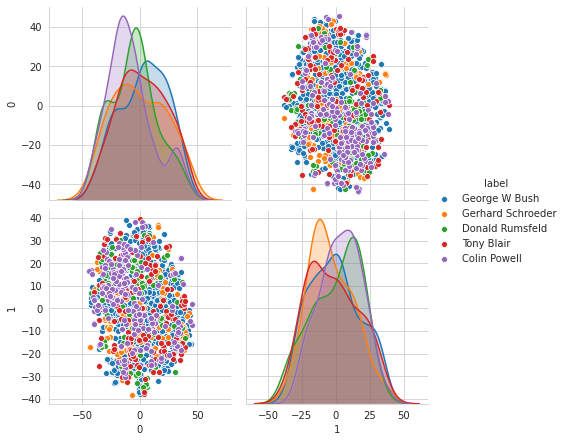

In [25]:
sns.set_style("whitegrid")
sns.pairplot(df_tsne,hue="label",height=3);

In [0]:
error=[]
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_tsne, y_train)
    pred_i = knn.predict(X_test_tsne)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

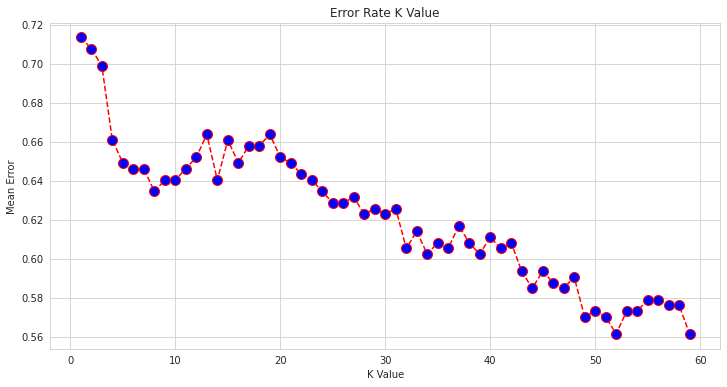

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 60), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [28]:
neigh = KNeighborsClassifier(n_neighbors=55)
neigh.fit(X_train_tsne, y_train)
y_pred = neigh.predict(X_test_tsne)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.12      0.06      0.08        71
  Donald Rumsfeld       0.00      0.00      0.00        37
    George W Bush       0.46      0.86      0.60       162
Gerhard Schroeder       0.00      0.00      0.00        22
       Tony Blair       0.00      0.00      0.00        50

         accuracy                           0.42       342
        macro avg       0.12      0.18      0.14       342
     weighted avg       0.24      0.42      0.30       342



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
y_pred = neigh.predict(X_tsne)
print(classification_report(y, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.12      0.06      0.08       236
  Donald Rumsfeld       0.15      0.03      0.05       121
    George W Bush       0.45      0.83      0.58       530
Gerhard Schroeder       0.00      0.00      0.00       109
       Tony Blair       0.00      0.00      0.00       144

         accuracy                           0.40      1140
        macro avg       0.14      0.19      0.14      1140
     weighted avg       0.25      0.40      0.29      1140



In [0]:
error=[]
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_pca, y_train)
    pred_i = knn.predict(X_test_pca)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

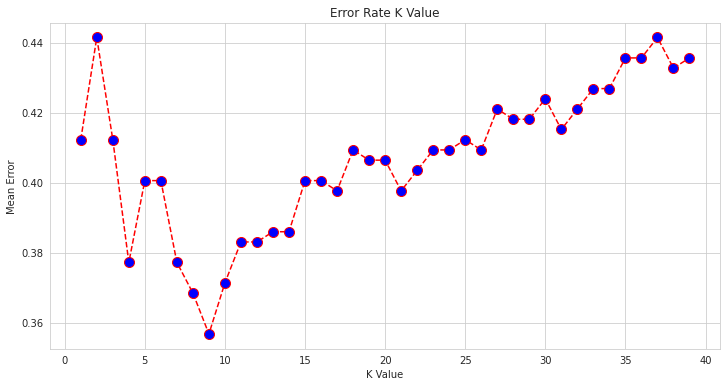

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [32]:
neigh2 = KNeighborsClassifier(n_neighbors=9)
neigh2.fit(X_train_pca, y_train)
y_pred = neigh2.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.56      0.77      0.65        71
  Donald Rumsfeld       0.92      0.32      0.48        37
    George W Bush       0.67      0.86      0.75       162
Gerhard Schroeder       0.69      0.41      0.51        22
       Tony Blair       0.56      0.10      0.17        50

         accuracy                           0.64       342
        macro avg       0.68      0.49      0.51       342
     weighted avg       0.66      0.64      0.60       342



In [33]:
y_pred = neigh2.predict(X_pca)
print(classification_report(y, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.63      0.84      0.72       236
  Donald Rumsfeld       0.78      0.42      0.55       121
    George W Bush       0.71      0.90      0.79       530
Gerhard Schroeder       0.71      0.27      0.39       109
       Tony Blair       0.84      0.25      0.39       144

         accuracy                           0.69      1140
        macro avg       0.73      0.54      0.57      1140
     weighted avg       0.72      0.69      0.66      1140



In [0]:
_,m,n = lfw_dataset.images.shape

In [0]:
eigenfaces = pca.components_.reshape((100, m, n))

In [36]:
eigenfaces.shape

(100, 62, 47)

In [0]:
def plot_gallery(images, titles, h, w, n_row=5, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


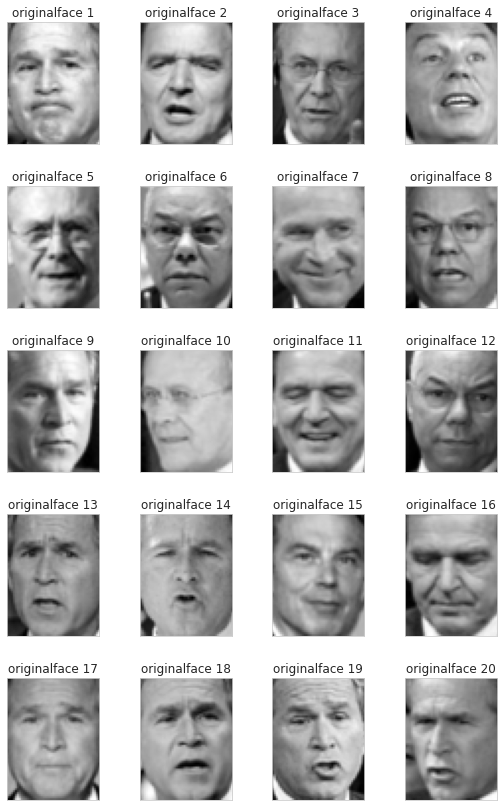

In [38]:
eigenface_titles = ["originalface %d" % i for i in range(1,eigenfaces.shape[0])]
plot_gallery(X, eigenface_titles, m, n)
plt.show()

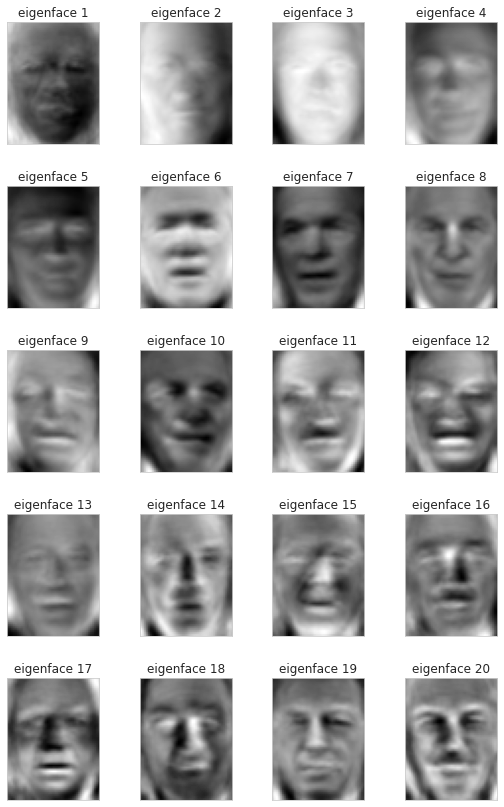

In [39]:
# plot the result of the prediction on a portion of the test set
eigenface_titles = ["eigenface %d" % i for i in range(1,eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, m, n)
plt.show()

In [0]:
pca = PCA(n_components = 0.80)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [41]:
X_train_pca.shape

(798, 31)

In [0]:
X_test_pca = pca.transform(X_test)

In [43]:
X_test_pca.shape

(342, 31)

In [0]:
error=[]
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_pca, y_train)
    pred_i = knn.predict(X_test_pca)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

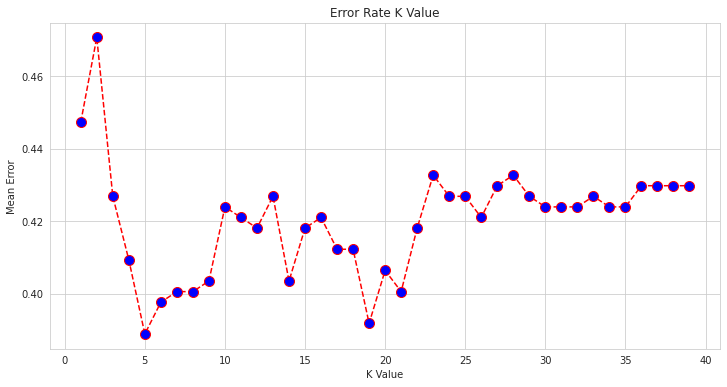

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [46]:
neigh2 = KNeighborsClassifier(n_neighbors=5)
neigh2.fit(X_train_pca, y_train)
y_pred = neigh2.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.50      0.75      0.60        71
  Donald Rumsfeld       0.57      0.35      0.43        37
    George W Bush       0.68      0.80      0.74       162
Gerhard Schroeder       0.57      0.36      0.44        22
       Tony Blair       0.56      0.10      0.17        50

         accuracy                           0.61       342
        macro avg       0.58      0.47      0.48       342
     weighted avg       0.61      0.61      0.57       342



In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap
PALETTE = sns.color_palette('deep', n_colors=3)
CMAP = ListedColormap(PALETTE.as_hex())
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.datasets import load_iris
data = load_iris()

In [0]:
y=data.target

In [0]:
df=pd.DataFrame(data.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [51]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [0]:
df['label']=y
#df['label']=df['label'].map({0:'setosa',1:'vesicolor',2:'virginica'})

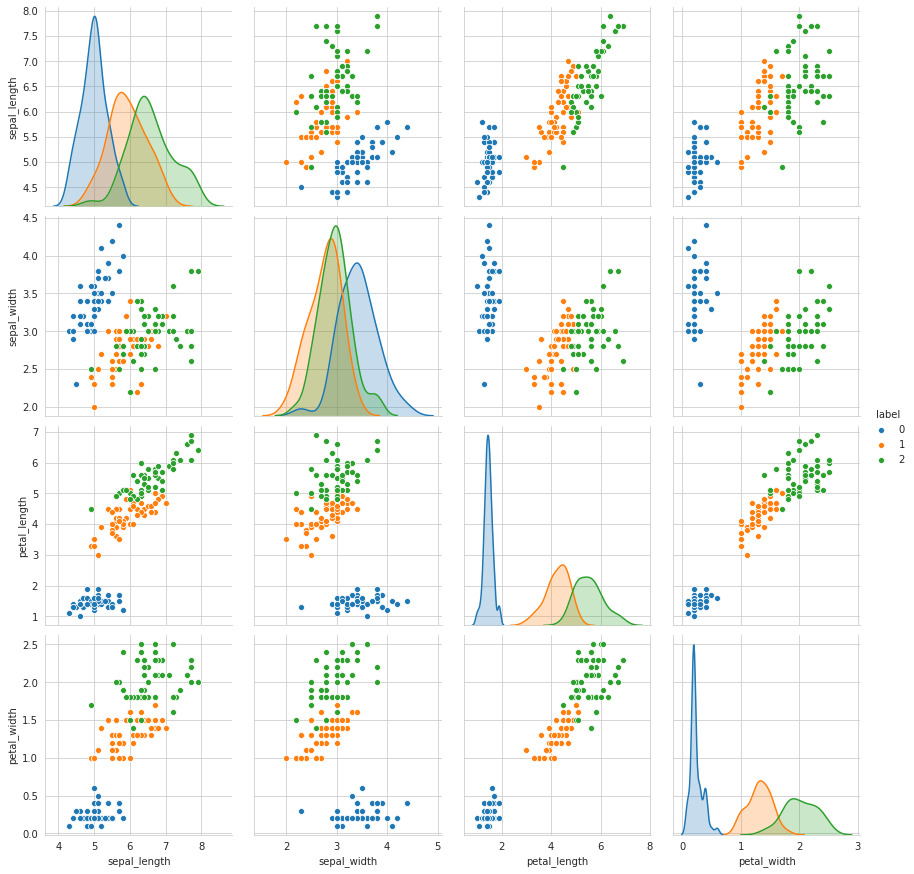

In [53]:
sns.pairplot(df,hue="label",size=3)

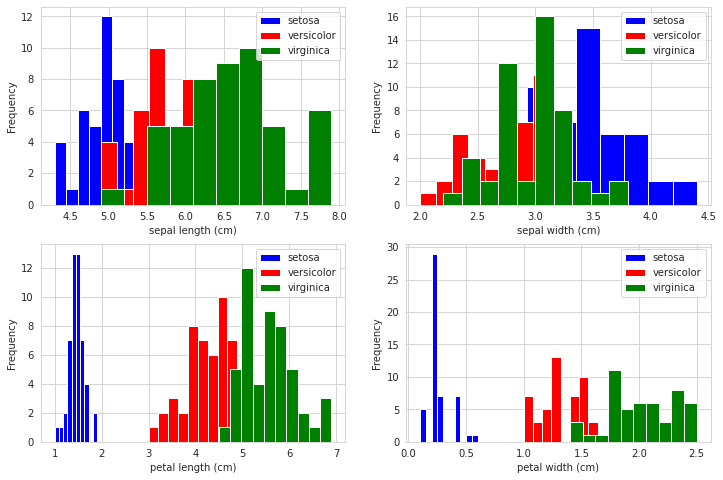

In [54]:
# bar plot visualisation of the dataset.All classes are shown separately vs all the features.
iris=load_iris()
fig, axes = plt.subplots(nrows= 2, ncols=2,figsize=(12,8))
colors= ['blue', 'red', 'green']

for i, ax in enumerate(axes.flat):
    for label, color in zip(range(len(iris.target_names)), colors):
        ax.hist(iris.data[iris.target==label, i], label=             
                            iris.target_names[label], color=color,bins=10)
        ax.set_xlabel(iris.feature_names[i])  
        ax.set_ylabel('Frequency')
        ax.legend(loc='upper right')

plt.show()

In [0]:
pca = PCA(n_components=2)
pca.fit(df)
X = pca.transform(df)

In [56]:
X

array([[-2.86541481e+00,  2.96294592e-01],
       [-2.89204667e+00, -1.83785089e-01],
       [-3.05498018e+00, -1.74826556e-01],
       [-2.92022951e+00, -3.31581792e-01],
       [-2.90685193e+00,  2.95916920e-01],
       [-2.48985229e+00,  7.33821200e-01],
       [-2.99073479e+00, -1.23337756e-01],
       [-2.81072341e+00,  1.49253233e-01],
       [-3.05102452e+00, -5.96522880e-01],
       [-2.85367989e+00, -1.18129504e-01],
       [-2.70121731e+00,  6.30088258e-01],
       [-2.79746912e+00,  1.83420106e-03],
       [-2.95910703e+00, -2.45743109e-01],
       [-3.36629732e+00, -5.60864364e-01],
       [-2.83188903e+00,  1.14006491e+00],
       [-2.58993648e+00,  1.30218121e+00],
       [-2.81008938e+00,  7.72676709e-01],
       [-2.83175695e+00,  2.89400035e-01],
       [-2.41526804e+00,  8.78798583e-01],
       [-2.77580155e+00,  4.85110874e-01],
       [-2.51699488e+00,  4.05235787e-01],
       [-2.73410906e+00,  4.09741412e-01],
       [-3.36069900e+00,  5.93621201e-02],
       [-2.

In [57]:
pca.get_covariance()

array([[ 0.68065577, -0.03357773,  1.266758  ,  0.52866445,  0.54282885],
       [-0.03357773,  0.17638011, -0.32133313, -0.13896642, -0.16600994],
       [ 1.266758  , -0.32133313,  3.12143244,  1.29135665,  1.37387595],
       [ 0.52866445, -0.13896642,  1.29135665,  0.59438425,  0.57876499],
       [ 0.54282885, -0.16600994,  1.37387595,  0.57876499,  0.67124542]])

In [58]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92264373, 0.04812763])

Text(0.5, 15.0, 'Principal components')

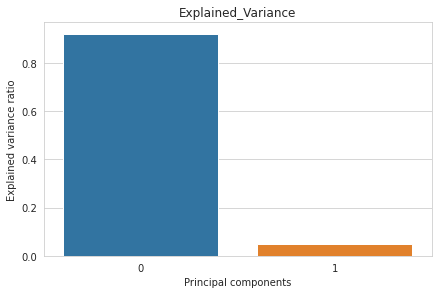

In [59]:
xx=[0,1]
sns.barplot(xx,explained_variance,).set_title("Explained_Variance")
plt.tight_layout()
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

In [0]:
ddf=pd.DataFrame(X,columns=['first_eigen_vector','second_eigen_vector'])

Text(0.5, 1.0, 'Data Visualisation along the Eigen Vectors')

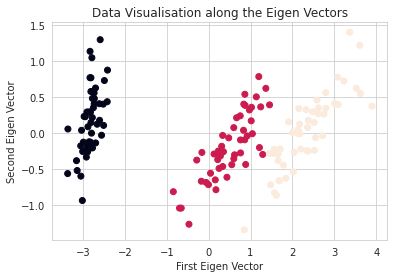

In [61]:
plt.scatter(x='first_eigen_vector',y='second_eigen_vector',data=ddf,c=y)
plt.xlabel('First Eigen Vector')
plt.ylabel('Second Eigen Vector')
plt.title('Data Visualisation along the Eigen Vectors')

In [62]:
ddf.describe().T

,count,mean,std,min,25%,50%,75%,max
first_eigen_vector,150.0,-2.738550e-16,2.199644,-3.366297,-2.722354,0.575670,1.765219,3.900246
second_eigen_vector,150.0,-4.063416e-16,0.502380,-1.344769,-0.292907,-0.005544,0.352452,1.405735


In [0]:
lst=[]
for x in range(len(ddf)):
    if(ddf.iloc[x,0]>0.55):
        lst.append(1)
    else:
        lst.append(0)

In [0]:
ddf['first_eigen_vector_label']=lst

In [65]:
ddf

,first_eigen_vector,second_eigen_vector,first_eigen_vector_label
0,-2.865415,0.296295,0
1,-2.892047,-0.183785,0
2,-3.054980,-0.174827,0
3,-2.920230,-0.331582,0
4,-2.906852,0.295917,0
...,...,...,...
145,2.173075,0.127588,1
146,1.784888,-0.443191,1
147,2.005296,0.010566,1
148,2.134042,0.037797,1


In [66]:
j=[]
{j.append(int((x>-0.02))) for x in ddf.iloc[:,1]}

{None}

In [0]:
ddf['second_eigen_vector_label']=j

In [68]:
ddf

,first_eigen_vector,second_eigen_vector,first_eigen_vector_label,second_eigen_vector_label
0,-2.865415,0.296295,0,1
1,-2.892047,-0.183785,0,0
2,-3.054980,-0.174827,0,0
3,-2.920230,-0.331582,0,0
4,-2.906852,0.295917,0,1
...,...,...,...,...
145,2.173075,0.127588,1,1
146,1.784888,-0.443191,1,0
147,2.005296,0.010566,1,1
148,2.134042,0.037797,1,1


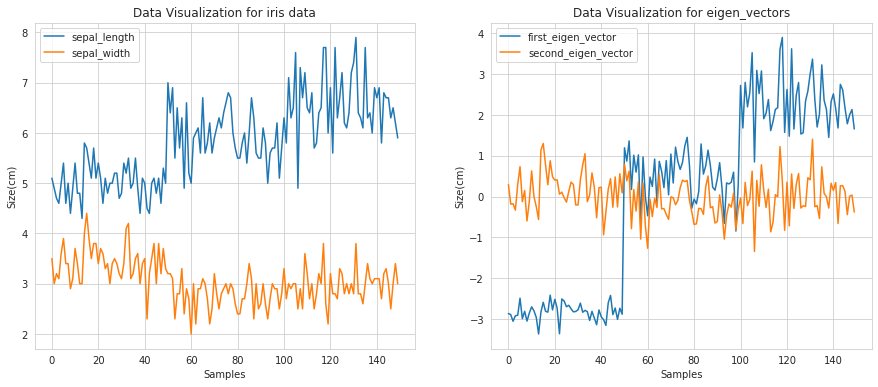

<Figure size 432x288 with 0 Axes>

In [69]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(df[['sepal_length','sepal_width']])
plt.legend(['sepal_length','sepal_width'],loc='best')
plt.title('Data Visualization for iris data')
plt.xlabel("Samples")
plt.ylabel('Size(cm)')
plt.subplot(1,2,2)
plt.plot(ddf[['first_eigen_vector','second_eigen_vector']])
plt.legend(['first_eigen_vector','second_eigen_vector'],loc='best')
plt.title('Data Visualization for eigen_vectors')
plt.xlabel("Samples")
plt.ylabel('Size(cm)')
plt.show()
plt.tight_layout()

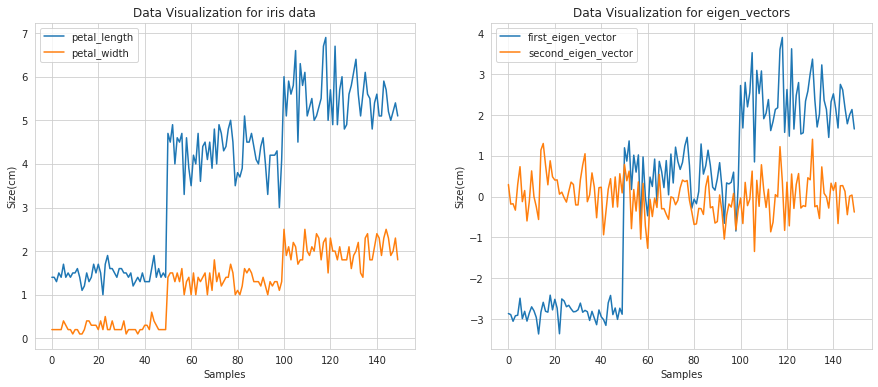

In [70]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(df[['petal_length','petal_width']])
plt.legend(['petal_length','petal_width'],loc='best')
plt.title('Data Visualization for iris data')
plt.xlabel("Samples")
plt.ylabel('Size(cm)')
plt.subplot(1,2,2)
plt.plot(ddf[['first_eigen_vector','second_eigen_vector']])
plt.legend(['first_eigen_vector','second_eigen_vector'],loc='best')
plt.title('Data Visualization for eigen_vectors')
plt.xlabel("Samples")
plt.ylabel('Size(cm)')
plt.show()

Text(0, 0.5, 'Second_eigen_vector')

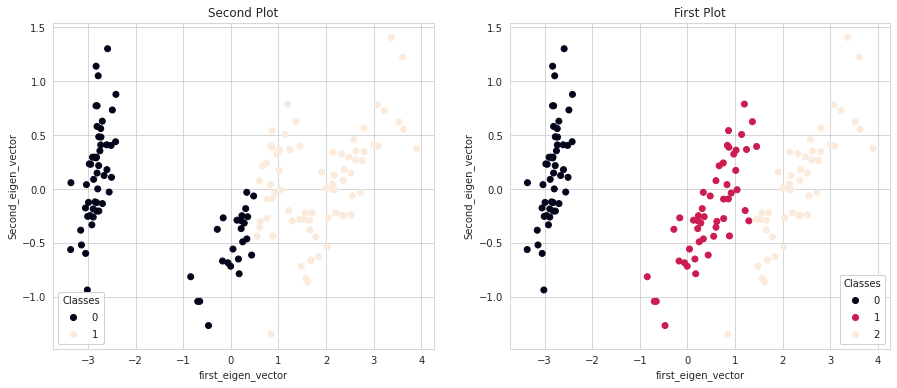

In [72]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
scatter=ax[0].scatter(ddf.iloc[:,0],ddf.iloc[:,1],c=ddf.iloc[:,2])
legend1 = ax[0].legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax[0].add_artist(legend1)
ax[0].set_xlabel('first_eigen_vector')
ax[0].set_ylabel('Second_eigen_vector')
scatter=ax[1].scatter(ddf.iloc[:,0],ddf.iloc[:,1],c=y)
legend1 = ax[1].legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax[1].add_artist(legend1)
ax[1].title.set_text('First Plot')
ax[0].title.set_text('Second Plot')
ax[1].set_xlabel('first_eigen_vector')
ax[1].set_ylabel('Second_eigen_vector')

Text(0, 0.5, 'Second_eigen_vector')

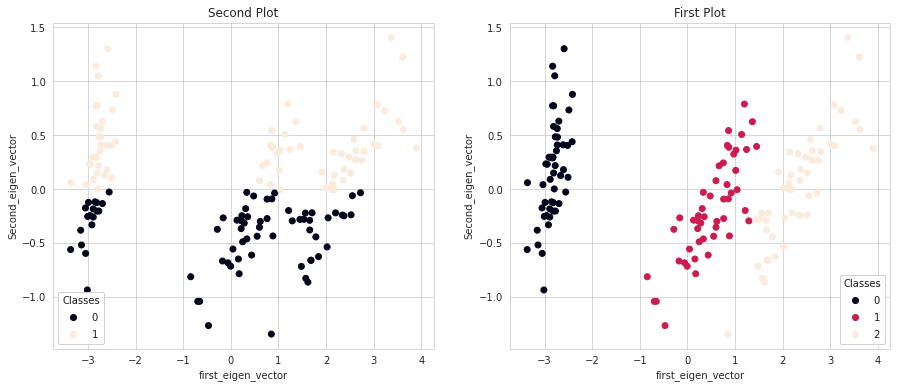

In [73]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
scatter=ax[0].scatter(ddf.iloc[:,0],ddf.iloc[:,1],c=ddf.iloc[:,3])
legend1 = ax[0].legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax[0].add_artist(legend1)
scatter=ax[1].scatter(ddf.iloc[:,0],ddf.iloc[:,1],c=y)
legend1 = ax[1].legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax[1].add_artist(legend1)
ax[1].title.set_text('First Plot')
ax[0].title.set_text('Second Plot')
ax[0].set_xlabel('first_eigen_vector')
ax[0].set_ylabel('Second_eigen_vector')
ax[1].set_xlabel('first_eigen_vector')
ax[1].set_ylabel('Second_eigen_vector')

In [0]:
setosa_versicolor = iris.data[0:100,0:4]
setosa_versicolor_targets = iris.target[0:100]
versicolor_virginica = iris.data[50:150,0:4]
versicolor_virginica_targets = iris.target[50:150]
setosa_virginica = np.concatenate((iris.data[0:50,0:4], iris.data[100:150,0:4]), axis=0)
setosa_virginica_targets = np.concatenate((iris.target[0:50], iris.target[100:150]), axis=0)
target_names = iris.target_names
t1 = ["setosa","versicolor"]
t2 = ["versicolor","virginica"]
t3 = ["setosa","virginica"]
lda = LDA(n_components=1)

In [0]:
def LDA_result(samples,target):
    return lda.fit(samples,target).transform(samples)

def threshold(LDA_result, targets,index_1, index_2):
    mean_class_1 = LDA_result[targets==index_1,0]
    mean_class_2 = LDA_result[targets==index_2,0]
    result_mean = (np.mean(mean_class_1) + np.mean(mean_class_1))/2
    return result_mean.round(decimals=15)

def scatterPlot(LDA_result,targets,index_1, index_2,text):
    for color, i, target_name in zip(['red', 'blue'], [index_1, index_2], target_names):
        plt.scatter(LDA_result[targets==i,0], np.zeros([50]), color=color,
        label=target_name)
        plt.title("Scatter plot for " + text + " classification")
    plt.show()

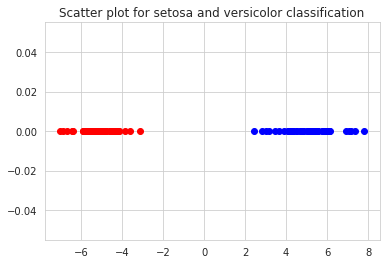

Threshold for setosa and versicolor classification: -5.08019541539774


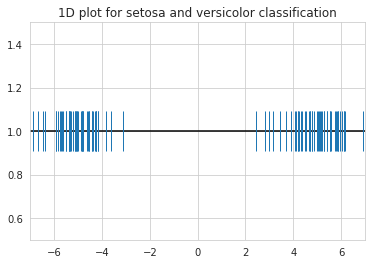

Text(0.5, 1.0, '1D plot for setosa and versicolor classification')

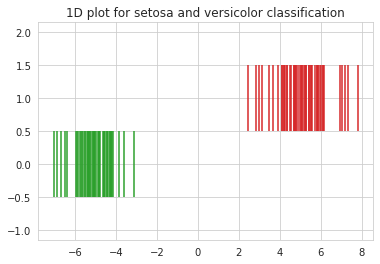

In [76]:
lda_result = LDA_result(setosa_versicolor,setosa_versicolor_targets)
scatterPlot(lda_result,setosa_versicolor_targets,0,1,"setosa and versicolor")
t = threshold(LDA_result(setosa_versicolor,setosa_versicolor_targets),setosa_versicolor_targets,0,1)
print("Threshold for setosa and versicolor classification: " + str(t))
plt.hlines(1,-7,7)
plt.xlim(-7,7)
plt.ylim(0.5,1.5)
y=np.ones(np.shape(lda_result))
plt.plot(lda_result,y,'|',ms=40)
plt.title("1D plot for setosa and versicolor classification")
plt.show()
x=np.array(lda_result)
x=x.reshape(2,50)
colors1 = ['C{}'.format(i) for i in range(2,4)]
plt.eventplot(x,color=colors1)
plt.title("1D plot for setosa and versicolor classification")

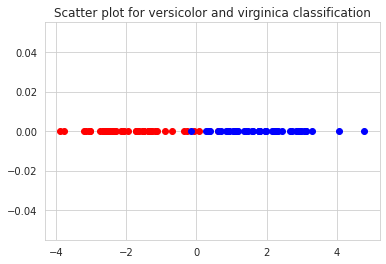

Threshold for versicolor and virginica classification: -1.885396895083514


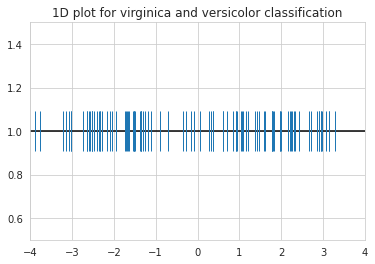

Text(0.5, 1.0, '1D plot for virginica and versicolor classification')

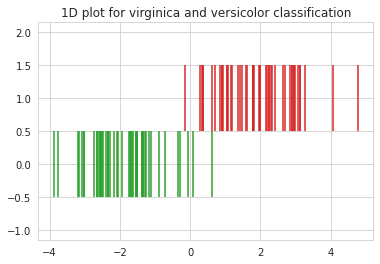

In [77]:
lda_result = LDA_result(versicolor_virginica,versicolor_virginica_targets)
scatterPlot(lda_result,versicolor_virginica_targets,1,2,"versicolor and virginica")
t = threshold(LDA_result(versicolor_virginica,versicolor_virginica_targets),versicolor_virginica_targets,1,2)
print("Threshold for versicolor and virginica classification: " + str(t))
plt.hlines(1,-4,4)
plt.xlim(-4,4)
plt.ylim(0.5,1.5)
y=np.ones(np.shape(lda_result))
plt.plot(lda_result,y,'|',ms=40)
plt.title("1D plot for virginica and versicolor classification")
plt.show()
x=np.array(lda_result)
x=x.reshape(2,50)
colors1 = ['C{}'.format(i) for i in range(2,4)]
plt.eventplot(x,color=colors1)
plt.title("1D plot for virginica and versicolor classification")

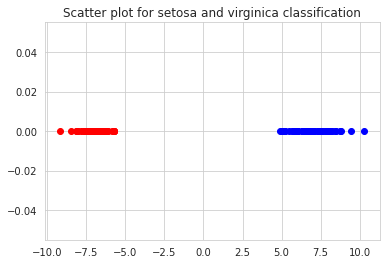

Threshold for setosa and virginica classification: -6.985440613150518


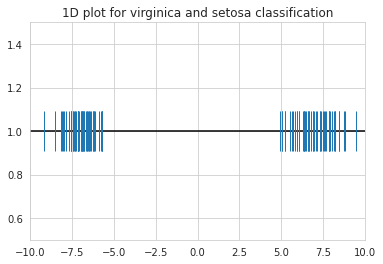

Text(0.5, 1.0, '1D plot for virginica and setosa classification')

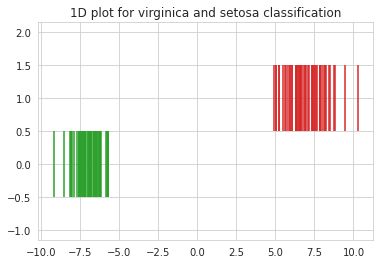

In [78]:
lda_result = LDA_result(setosa_virginica,setosa_virginica_targets)
scatterPlot(lda_result,setosa_virginica_targets,0,2,"setosa and virginica")
t = threshold(LDA_result(setosa_virginica,setosa_virginica_targets),setosa_virginica_targets,0,2)
print("Threshold for setosa and virginica classification: " + str(t))
plt.hlines(1,-10,10)
plt.xlim(-10,10)
plt.ylim(0.5,1.5)
y=np.ones(np.shape(lda_result))
plt.plot(lda_result,y,'|',ms=40)
plt.title("1D plot for virginica and setosa classification")
plt.show()
x=np.array(lda_result)
x=x.reshape(2,50)
colors1 = ['C{}'.format(i) for i in range(2,4)]
plt.eventplot(x,color=colors1)
plt.title("1D plot for virginica and setosa classification")

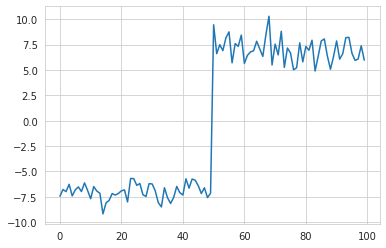

In [79]:
plt.plot(lda_result)

In [0]:
y=df.label

In [0]:
ldas = LDA(n_components=2)
def LDA_results(samples,target):
    return ldas.fit(samples,target).transform(samples)
lda_result = LDA_results(df,y)

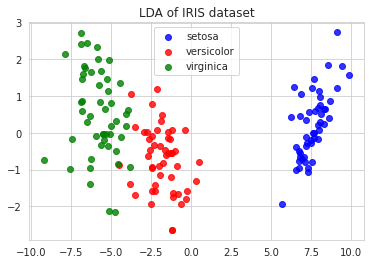

In [82]:
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(lda_result[y == i, 0], lda_result[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

In [0]:
X_embedded = TSNE(n_components=2,metric='sqeuclidean').fit_transform(df)

In [0]:
X_embedded2 =TSNE(n_components=3,metric='sqeuclidean').fit_transform(df)

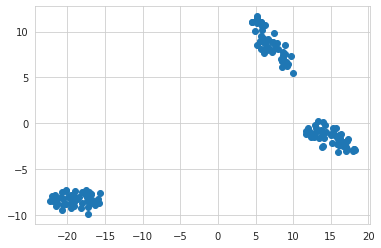

In [85]:
plt.scatter(X_embedded[:,0],X_embedded[:,1])

In [0]:
def plot_iris_2d(x, y, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    sns.set_style("darkgrid")
    
    plt.scatter(x, y,
        c=iris.target,
        cmap=CMAP,
        s=70)
    
    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

In [0]:
def plot_iris_3d(x, y, z, title):
    sns.set_style('whitegrid')
    
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    
    ax.scatter(x, y, z,
               c=iris.target,
               cmap=CMAP,
               s=40)
    
    ax.set_title(title, fontsize=20, y=1.03)
    
    fsize = 14
    ax.set_xlabel("1st eigenvector", fontsize=fsize)
    ax.set_ylabel("2nd eigenvector", fontsize=fsize)
    ax.set_zlabel("3rd eigenvector", fontsize=fsize)
    
#     ax.w_xaxis.set_ticklabels([])
#     ax.w_yaxis.set_ticklabels([])
#     ax.w_zaxis.set_ticklabels([])

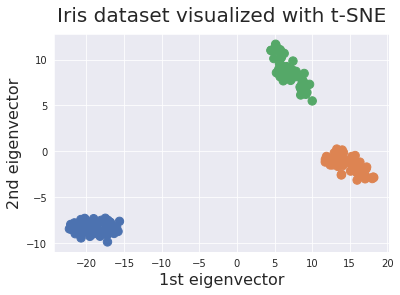

In [88]:
plot_iris_2d(X_embedded[:,0],X_embedded[:,1],title = 'Iris dataset visualized with t-SNE')

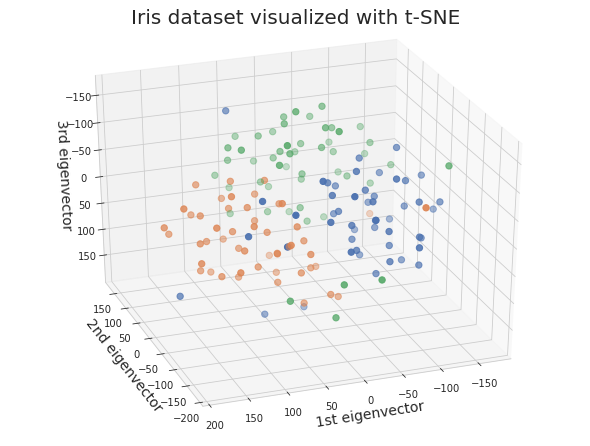

In [89]:
plot_iris_3d(X_embedded2[:,0],X_embedded2[:,1],X_embedded2[:,2],title = 'Iris dataset visualized with t-SNE')

In [0]:
metric='precomputed'

In [0]:
X_embedded = TSNE(n_components=2,metric='manhattan').fit_transform(df)

In [0]:
X_embedded2 =TSNE(n_components=3,metric='manhattan').fit_transform(df)

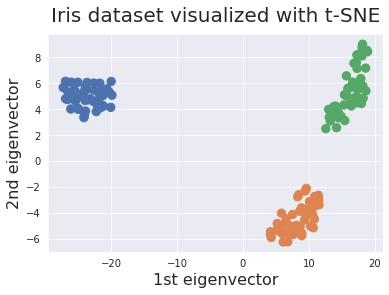

In [93]:
plot_iris_2d(X_embedded[:,0],X_embedded[:,1],title = 'Iris dataset visualized with t-SNE')

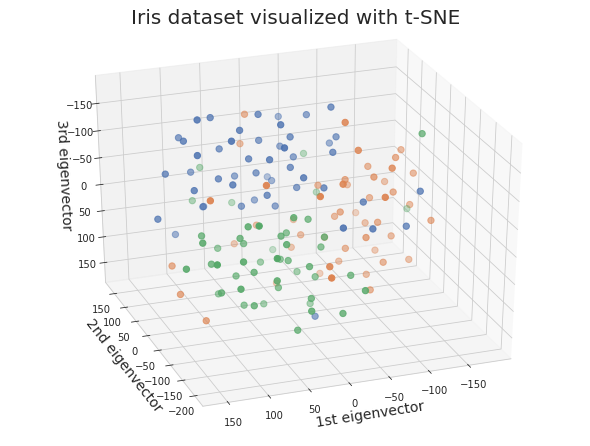

In [94]:
plot_iris_3d(X_embedded2[:,0],X_embedded2[:,1],X_embedded2[:,2],title = 'Iris dataset visualized with t-SNE')

In [0]:
df_petal=df.iloc[:,2:]

In [0]:
df_petal=df_petal.drop(['label'],1)

In [0]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(df_petal.iloc[:100,:],y[:100],test_size=0.3,random_state=21)
X_train2,X_test2,Y_train2,Y_test2=train_test_split(df_petal.iloc[50:150,:],y[50:150],test_size=0.3,random_state=21)
X_train3,X_test3,Y_train3,Y_test3=train_test_split(setosa_virginica,setosa_virginica_targets,test_size=0.3,random_state=21)
Xa_train,Xa_test,Ya_train,Ya_test=train_test_split(df_petal,y,test_size=0.3,shuffle=True)

In [98]:
svc1 = svm.SVC(kernel='linear', C=1).fit(X_train1, Y_train1)
output1=svc1.predict(X_test1)
print(classification_report(Y_test1,output1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [99]:
svc2 = svm.SVC(kernel='linear', C=1).fit(X_train2, Y_train2)
output2=svc2.predict(X_test2)
print(classification_report(Y_test2,output2))

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.95      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



In [100]:
X_test3=X_test3[:,2:]
X_train3=X_train3[:,2:]
svc3 = svm.SVC(kernel='linear', C=1).fit(X_train3, Y_train3)
output3=svc3.predict(X_test3)
for i in range(len(output3)):
    if output3[i]==1:
        output3[i]=2
print(classification_report(Y_test3,output3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



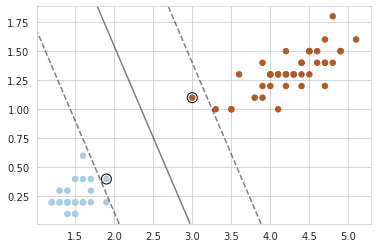

In [101]:
plt.scatter(X_train1.iloc[:, 0], X_train1.iloc[:, 1], c=Y_train1, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc1.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svc1.support_vectors_[:, 0], svc1.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

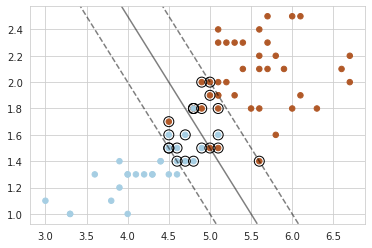

In [102]:
plt.scatter(X_train2.iloc[:, 0], X_train2.iloc[:, 1], c=Y_train2, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc2.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svc2.support_vectors_[:, 0], svc2.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

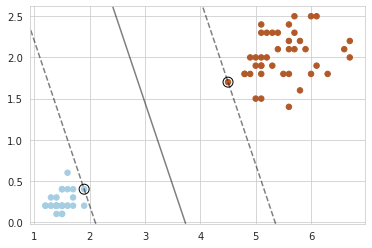

In [103]:
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=Y_train3, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc3.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svc3.support_vectors_[:, 0], svc3.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [0]:
svc = svm.SVC(kernel='linear', C=100).fit(df_petal, y)

In [0]:
h=0.02
x_min, x_max = df_petal.iloc[:, 0].min() - 1, df_petal.iloc[:, 0].max() + 1
y_min, y_max = df_petal.iloc[:, 1].min() - 1, df_petal.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

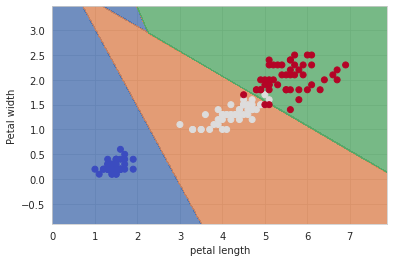

In [106]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=CMAP, alpha=0.8)

# Plot also the training points
plt.scatter(df_petal.iloc[:, 0], df_petal.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('petal length')
plt.ylabel('Petal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [107]:
output_full=svc.predict(df_petal)
print(classification_report(y,output_full))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [108]:
svc1 = svm.SVC(kernel='linear', C=0.001).fit(X_train1, Y_train1)
output1=svc1.predict(X_test1)
print(classification_report(Y_test1,output1))
svc1 = svm.SVC(kernel='linear', C=1000).fit(X_train1, Y_train1)
output1=svc1.predict(X_test1)
print(classification_report(Y_test1,output1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.30      1.00      0.46         9

    accuracy                           0.30        30
   macro avg       0.15      0.50      0.23        30
weighted avg       0.09      0.30      0.14        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [109]:
svc2 = svm.SVC(kernel='linear', C=0.001).fit(X_train2, Y_train2)
output2=svc2.predict(X_test2)
print(classification_report(Y_test2,output2))
svc2 = svm.SVC(kernel='linear', C=1000).fit(X_train2, Y_train2)
output2=svc2.predict(X_test2)
print(classification_report(Y_test2,output2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.30      1.00      0.46         9

    accuracy                           0.30        30
   macro avg       0.15      0.50      0.23        30
weighted avg       0.09      0.30      0.14        30

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.95      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



In [110]:
svc3 = svm.SVC(kernel='linear', C=0.001).fit(X_train3, Y_train3)
output3=svc3.predict(X_test3)
for i in range(len(output3)):
    if output3[i]==1:
        output3[i]=2
print(classification_report(Y_test3,output3))
svc3 = svm.SVC(kernel='linear', C=1000).fit(X_train3, Y_train3)
output3=svc3.predict(X_test3)
for i in range(len(output3)):
    if output3[i]==1:
        output3[i]=2
print(classification_report(Y_test3,output3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           2       0.30      1.00      0.46         9

    accuracy                           0.30        30
   macro avg       0.15      0.50      0.23        30
weighted avg       0.09      0.30      0.14        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [111]:
svc = svm.SVC(kernel='linear', C=0.001).fit(Xa_train,Ya_train)
output2=svc.predict(Xa_test)
print(classification_report(Ya_test,output2))
svc = svm.SVC(kernel='linear', C=1000).fit(Xa_train, Ya_train)
output2=svc.predict(Xa_test)
print(classification_report(Ya_test,output2))

              precision    recall  f1-score   support

           0       0.27      1.00      0.42        12
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        17

    accuracy                           0.27        45
   macro avg       0.09      0.33      0.14        45
weighted avg       0.07      0.27      0.11        45

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      1.00      0.89        16
           2       1.00      0.76      0.87        17

    accuracy                           0.91        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.93      0.91      0.91        45



In [112]:
svc1 = svm.SVC(kernel='rbf', C=1,gamma=.01).fit(X_train1, Y_train1)
output1=svc1.predict(X_test1)
print(classification_report(Y_test1,output1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [113]:
svc2 = svm.SVC(kernel='rbf', C=1,gamma=.01).fit(X_train2, Y_train2)
output2=svc2.predict(X_test2)
print(classification_report(Y_test2,output2))

              precision    recall  f1-score   support

           1       1.00      0.62      0.76        21
           2       0.53      1.00      0.69         9

    accuracy                           0.73        30
   macro avg       0.76      0.81      0.73        30
weighted avg       0.86      0.73      0.74        30



In [114]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(df_petal.iloc[:100,:],y[:100],test_size=0.3,random_state=21)
X_train2,X_test2,Y_train2,Y_test2=train_test_split(df_petal.iloc[50:150,:],y[50:150],test_size=0.3,random_state=21)
X_train3,X_test3,Y_train3,Y_test3=train_test_split(setosa_virginica,setosa_virginica_targets,test_size=0.3,random_state=21)
Xa_train,Xa_test,Ya_train,Ya_test=train_test_split(df_petal,y,test_size=0.3,shuffle=True)
X_test3=X_test3[:,2:]
X_train3=X_train3[:,2:]
svc3 = svm.SVC(kernel='rbf', C=1,gamma=0.01).fit(X_train3, Y_train3)
output3=svc3.predict(X_test3)
for i in range(len(output3)):
    if output3[i]==1:
        output3[i]=2
print(classification_report(Y_test3,output3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



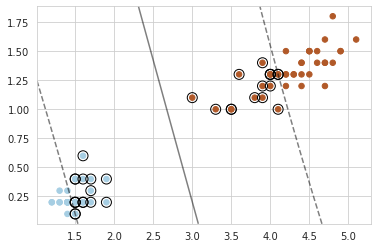

In [115]:
plt.scatter(X_train1.iloc[:, 0], X_train1.iloc[:, 1], c=Y_train1, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc1.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svc1.support_vectors_[:, 0], svc1.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

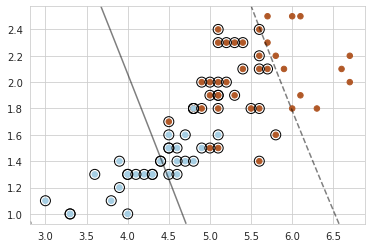

In [116]:
plt.scatter(X_train2.iloc[:, 0], X_train2.iloc[:, 1], c=Y_train2, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc2.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svc2.support_vectors_[:, 0], svc2.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

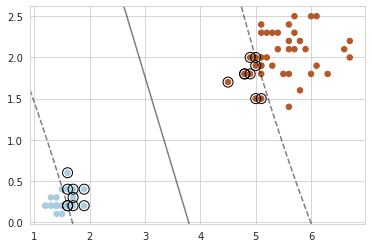

In [117]:
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=Y_train3, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc3.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svc3.support_vectors_[:, 0], svc3.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [0]:
svc = svm.SVC(kernel='rbf',gamma=0.01, C=1).fit(df_petal, y)

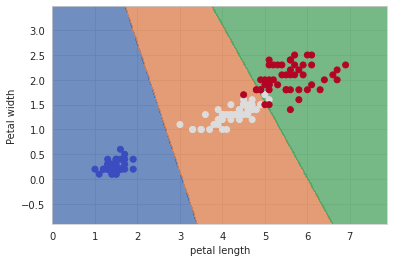

In [119]:
h=0.02
x_min, x_max = df_petal.iloc[:, 0].min() - 1, df_petal.iloc[:, 0].max() + 1
y_min, y_max = df_petal.iloc[:, 1].min() - 1, df_petal.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=CMAP, alpha=0.8)

# Plot also the training points
plt.scatter(df_petal.iloc[:, 0], df_petal.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('petal length')
plt.ylabel('Petal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [120]:
output_full=svc.predict(Xa_test)
print(classification_report(Ya_test,output_full))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94        16
           2       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [121]:
svc1 = svm.SVC(kernel='rbf', C=0.001,gamma=0.01).fit(X_train1, Y_train1)
output1=svc1.predict(X_test1)
print(classification_report(Y_test1,output1))
svc1 = svm.SVC(kernel='rbf', C=1000,gamma=0.01).fit(X_train1, Y_train1)
output1=svc1.predict(X_test1)
print(classification_report(Y_test1,output1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.30      1.00      0.46         9

    accuracy                           0.30        30
   macro avg       0.15      0.50      0.23        30
weighted avg       0.09      0.30      0.14        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [122]:
svc2 = svm.SVC(kernel='rbf', gamma=0.01,C=0.001).fit(X_train2, Y_train2)
output2=svc2.predict(X_test2)
print(classification_report(Y_test2,output2))
svc2 = svm.SVC(kernel='rbf',gamma=0.01 ,C=1000).fit(X_train2, Y_train2)
output2=svc2.predict(X_test2)
print(classification_report(Y_test2,output2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.30      1.00      0.46         9

    accuracy                           0.30        30
   macro avg       0.15      0.50      0.23        30
weighted avg       0.09      0.30      0.14        30

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.95      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



In [123]:
svc3 = svm.SVC(kernel='rbf',gamma=0.01, C=0.001).fit(X_train3, Y_train3)
output3=svc3.predict(X_test3)
for i in range(len(output3)):
    if output3[i]==1:
        output3[i]=2
print(classification_report(Y_test3,output3))
svc3 = svm.SVC(kernel='rbf',gamma=0.01, C=1000).fit(X_train3, Y_train3)
output3=svc3.predict(X_test3)
for i in range(len(output3)):
    if output3[i]==1:
        output3[i]=2
print(classification_report(Y_test3,output3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           2       0.30      1.00      0.46         9

    accuracy                           0.30        30
   macro avg       0.15      0.50      0.23        30
weighted avg       0.09      0.30      0.14        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [124]:
svc = svm.SVC(kernel='rbf',gamma=0.01, C=0.001).fit(Xa_train,Ya_train)
output2=svc.predict(Xa_test)
print(classification_report(Ya_test,output2))
svc = svm.SVC(kernel='rbf',gamma=0.01, C=1000).fit(Xa_train, Ya_train)
output2=svc.predict(Xa_test)
print(classification_report(Ya_test,output2))

              precision    recall  f1-score   support

           0       0.22      1.00      0.36        10
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        19

    accuracy                           0.22        45
   macro avg       0.07      0.33      0.12        45
weighted avg       0.05      0.22      0.08        45

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.94      1.00      0.97        16
           2       1.00      0.95      0.97        19

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

